<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications-2025/blob/main/485%5B2025%5D_Week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Networks (CNNs)**:

#### The term CNN refers to a Neural Network architecture that is mostly used in Images/Video but has been also successfuly implemented for other tasks, such as time-series, forecasting, audio and other types of data that involve some type of spatio-temporal structure.


<div style="margin: auto; width: 90%">
<img src="https://miro.medium.com/v2/resize:fit:1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" alt="Subdirectory Image" width="900"/>
</div>

#### As an architecture it usually involves:

#### 1. **Convolutions (2D in Images)**: The Network learns useful Convolutional Kernels that are *"looking for"* important features of our data Distribution. For example in the physical world, there are a lot of edges, corners, patches etc. The CNN given that kind of images could learn to encode these features into its convolutional kernels. These kernels are also called filters.
#### 2. **Pooling Layers (Max, Average)** that downsample the original input, while at the same time transfering semantic information *(Oh Look! One of the convolutions generates a really big value at a specific image location. This convolution potentially represents the identification of a specific feature, a beak, a leg or something else. The pooling Layer transfers this big pixel value representing an identified feature in a downsampled space. Great!!)*

#### 3. One or more Fully connected Layers that map the final feature maps into $K$ scalars that represent how big is the association of the input image to the Training Classes. Usually, the final scalar values associated with each class are mapped into a Probability Simplex, through the SoftMax function, as follows:

<div style="font-size: 28px;">

\begin{equation}
\sigma(z_i) = \frac{e^{z_i}}{\sum_{i=1}^{K} e^{z_i}}
\end{equation}

</div>

Suppose the model is trying to classify an image into 3 classes: cat, dog, bird or snake.

The raw outputs from the network might be: [-0.1, 3.8, 1.1, -0.3] <br>
After applying the Softmax function, we get: [0.02, 0.91, 0.06, 0.01]<br>
This means:

2% chance it’s a cat, 91% chance it’s a dog, and 6% chance it’s a bird, and 1% it's a snake.

So the model picks dog as its answer.

#### 4. A Cross Entropy Loss Function that is a metric of how much do distributions diverge. For example for a given $K=3$ class problem, assuming the Network outputs predicted probabilities of the form $\vec{p} = [0.15, 0.05, 0.8]$, for a given Image with class labels $\vec{l}=[0, 0, 1]$, Cross Entropy is a measure of how much do these two vector distributions diverge. A zero Cross Entropy is acquired for matching distributions (If predicts the right class with 100% probability). Assuming a $K$ class classification problem, the Cross Entropy Loss Function takes the following form:

<div style="font-size: 28px;">

\begin{equation}
\mathbb{L}= - \sum_{c=1}^{K} y_{o,c} log(\hat{y_{o, c}})
\end{equation}

</div>

#### Where:

#### 1. $y_{o, c}$: Is the class $c$ label of the observation $o$
#### 2. $\hat{y_{o, c}}$: Is the predicted probability that observation $o$ is of class $c$.

<div style="margin: auto; width: 90%">
<img src="https://cdn-useast1.kapwing.com/static/templates/loss-meme-template-regular-7bd3f11a.webp" alt="Subdirectory Image" width="200"/>
</div>

---

## ***Convolutions***: Are implemented using the nn.Conv2d() Pytorch function.

<div style="margin: auto; width: 90%">
<img src="https://www.researchgate.net/profile/Roberto-Dautilia/publication/334416432/figure/fig2/AS:779859919904768@1562944502176/A-2D-convolution-example.jpg" alt="Subdirectory Image" width="500"/>
</div>

### ***Parameters:***

- #### input channels
- #### output channels
- #### kernel size
- #### stride
- #### padding

#### *Usually, if you want to retain the size of the image you perform a convolution with a specific kernel size, a stride of $1$ and a padding of $\frac{kernel size}{2}$*


#### The stride can be visualized as follows:


<div style="margin: auto; width: 90%">
<img src="https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/Stride_item_banner.png?resize=760%2C505&ssl=1" alt="Subdirectory Image" width="700"/>
</div>

#### The relationship associating input and output dimensions with respect to $nn.Conv2d()$ parameters is the following:

<div style="font-size: 28px;">

\begin{equation}
W_{\text{out}} = \left\lfloor \frac{W - K + 2P}{S} + 1 \right\rfloor
\end{equation}

</div>


<div style="font-size: 28px;">

\begin{equation}
H_{\text{out}} = \left\lfloor \frac{H - K + 2P}{S} + 1 \right\rfloor
\end{equation}

</div>

#### ***Where:***:

- #### $H, K$: are the Input Height and Width
- #### $K$: is the Kernel size
- #### $P$: is the specified Padding
- #### $S$: is the specified Stride
- #### $\left\lfloor . \right\rfloor$: denotes the floor division

----

## ***Pooling***:

#### Refers to aggregation operations that occur in windowed patches along the image. Most used Pooling Operations are MaxPooling() where the maximum value within a window is returned and Average Pooling, where the average Pixel value within a specified window is returned.


<div style="margin: auto; width: 90%">
<img src="https://www.researchgate.net/publication/373937881/figure/fig5/AS:11431281188853004@1694790920039/Visualization-of-the-Max-pooling-operation.png" alt="Subdirectory Image" width="700"/>
</div>

---

## ***ReLU Activation***:

#### Is usually used to introduce Non-Linearity to the Model and rectify the output allowing only positive values.

<div style="margin: auto; width: 90%">
<img src="https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png" alt="Subdirectory Image" width="700"/>
</div>

---

## *In this Assignment*:

### 1. We will build a simple Fully Connected Neural Network to classify the infamous MNIST dataset digits.
### 2. We will then build a simple CNN and compare it with the previous architecture in terms of performance and complexity (no. of parameters etc.)
### 3. We will visualize the Feature Maps and the Kernel Filters
### 4. We will  learn how to use strong pretrained Models to carry out our own custom Classification task
### 5. We will learn how to visualize where the Network pays attention to perform a specific classification

In [ ]:
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
import os
import torch
import numpy as np
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.transforms.v2 as v2

from tqdm import tqdm
from torch import nn


### In most Pytorch projects you will probably have to work with and overwrite ***(inherit from)*** the following classes/modules:

#### 1. torchvision.transforms, torchvision.transforms.v2: That is a module utility that can help you automate any data augmentation or transformation tasks you want to apply to your dataset at load-time. You can compose several transforms using the v2.Compose() funciton and pass in the **Transforms** object as an argument to a Dataset object

#### 2. Datasets: You can overwrite (inherit) from the Pytorch's Dataset base class or you can use pre-existing Datasets, such as MNIST, Fashion-MNIST, CIFAR-10 and many more. When extending the base class you have to write your own $\_\_len\_\_()$ and $\_\_getitem\_\_()$ funcitons.

#### 3. DataLoaders: Once again you can write your own custom DataLoader or you can simply pass in some basic parameters such as, the dataset you want to load, shuffle and batch size. In a sense a DataLoader is responsible in loading the (shuffled or not) mini-Batches so that you can implement mini-batch SGD.

#### 4. Modules-> nn.Module: Are used as a baseClass to define a Neural Network or a subpart of one. You usually have to implement your own $forward(x)$ method that defines the mathematical operations that transform $x$, into the output $y$


*For more Information check:*

1. *https://pytorch.org/tutorials/beginner/basics/data_tutorial.html*
2. *https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html*
3. *https://pytorch.org/vision/stable/transforms.html*

In [ ]:
# Import necessary modules
import torch
import torchvision
import torchvision.transforms.v2 as v2  # Using torchvision's newer transform v2 module

# Define normalization parameters:
# These are the mean and standard deviation values used to normalize the dataset.
# Since MNIST images are grayscale, we only need one value per channel (1 channel).
mean = [0.485]  # Mean pixel value (can be computed from dataset or borrowed from standard settings)
std = [0.229]   # Standard deviation of pixel values

# Define a transformation pipeline for the **training set**
# This includes converting to image format, casting to float and scaling to [0,1],
# then normalizing using the specified mean and std.
transforms_train = v2.Compose([
    v2.ToImage(),                                # Convert input (e.g., PIL image or array) to torch image tensor
    v2.ToDtype(torch.float32, scale=True),       # Convert data to float32 and scale pixel values from [0, 255] to [0, 1]
    v2.Normalize(mean=mean, std=std),            # Normalize each pixel: (x - mean) / std
])

# Define the same transformation pipeline for the **test set**
# This ensures the input format is consistent during evaluation.
transforms_test = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=mean, std=std),
])

# Set batch size for training and testing
batch_size = 128

# Load the MNIST training dataset
trainset = torchvision.datasets.MNIST(
    root="./Data",              # local folder where the data will be stored
    train=True,                 # specifies this is the training set
    transform=transforms_train, # applies the transformation pipeline to each image
    download=True               # downloads the dataset if it's not already available
)

# Create a DataLoader for the training set
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size, # number of samples per batch
    shuffle=True           # shuffles the data at every epoch for better training
)

# Load the MNIST test dataset using the same process as the training set
# This is used to evaluate the model after (or during) training.
testset = torchvision.datasets.MNIST(
    root="./Data",
    train=False,
    transform=transforms_test,
    download=True
)

# Create a DataLoader for the test set
# - shuffle=False: ensures the test data is loaded in the same order every time (important for consistent evaluation)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.56MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 135kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.33MB/s]


torch.Size([1, 1, 1])


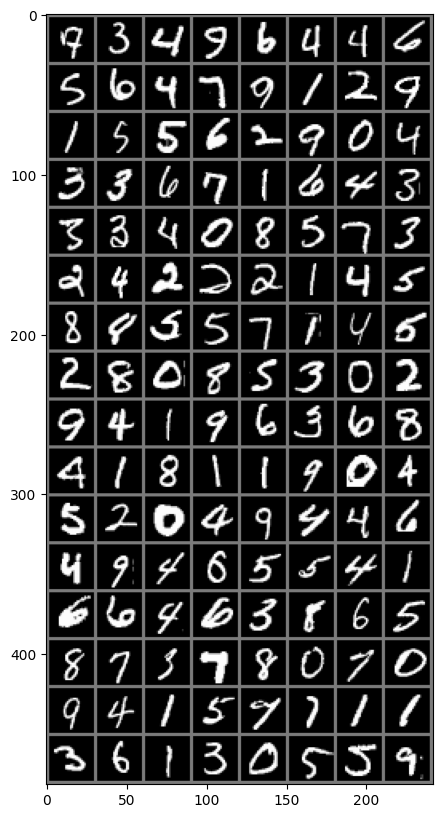

7 3 4 9 6 4 4 6 5 6 4 7 9 1 2 9 1 5 5 6 2 9 0 4 3 3 6 7 1 6 4 3 3 3 4 0 8 5 7 3 2 4 2 2 2 1 4 5 8 8 5 5 7 1 4 5 2 8 0 8 5 3 0 2 9 4 1 9 6 3 6 8 4 1 8 1 1 9 0 4 5 2 0 4 9 4 4 6 4 9 4 6 5 5 4 1 6 6 4 6 3 8 6 5 8 7 3 7 8 0 7 0 9 4 1 5 7 7 1 1 3 6 1 3 0 5 5 9


In [ ]:
# Load and Visualize a Transformed Image
def unnormalize(image, mean, std):
    mean = torch.tensor(mean).view(-1, 1, 1)
    print(mean.shape)
    std = torch.tensor(std).view(-1, 1, 1)
    return image * std + mean  # Reverse normalization to bring image back to original scale for visualization

def image_show(image):
    image = unnormalize(image, mean, std).numpy()   # Convert image tensor back to NumPy array for plotting
    image = np.transpose(image, (1, 2, 0))          # Rearrange dimensions from (C, H, W) to (H, W, C)
    fig, axs = plt.subplots(1, 1, figsize=(10, 10)) # Create a figure and axis for plotting
    axs.imshow(image)                               # Display image using matplotlib
    plt.show()                                      # Render the plot

dataiter = iter(trainloader)     # Create an iterator from the training DataLoader
images, labels = next(dataiter)  # Get the first batch of images and their corresponding labels
classes = np.arange(10)          # Define class labels from 0 to 9 (since MNIST has digits 0–9)

# show images
img_grid = torchvision.utils.make_grid(images)  # Combine a batch of images into a single grid image
image_show(img_grid)  # Display the image grid
# print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))  # Print class labels for each image in the batch


In [ ]:
# Build a simple Fully Connected Network
class FCN(nn.Module):

    def __init__(self, nodes, input_size=28*28, classes=10):
        super().__init__()
        self.flatten = nn.Flatten()  # Flattens the 2D image into a 1D vector

        layers = []
        layers.append(nn.Linear(input_size, nodes[0])) # First fully connected layer
        layers.append(nn.ReLU(inplace=True))           # First ReLU activation

        # Add hidden layers dynamically based on nodes list
        for i in range(len(nodes)-1):
            layers.append(nn.Linear(nodes[i], nodes[i+1])) # Hidden fully connected layer
            layers.append(nn.ReLU(inplace=True))           # ReLU activation for hidden layer

        self.sequential = nn.Sequential(*layers)   # Sequential container to hold the layers
        self.final = nn.Linear(nodes[-1], classes) # Final output layer mapping to class scores

    def forward(self, x):
        x = self.flatten(x)    # Flatten input images
        x = self.sequential(x) # Pass through hidden layers
        out = self.final(x)    # Final class score output

        return out

# Build a CNN
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 5, padding=2)  # First convolutional layer: input=1 channel (grayscale), output=16 channels
        self.pool = nn.MaxPool2d(2)                  # 2x2 max pooling to reduce spatial size
        self.conv2 = nn.Conv2d(16, 32, 5, padding=2) # Second convolutional layer: input=16 channels, output=32
        self.fc1 = nn.Linear(32 * 7 * 7, 10)         # Fully connected layer mapping flattened features to 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> Pooling

        # After two pooling operations, 28x28 input reduces to 7x7 feature maps
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)         # Final fully connected layer to get class scores

        return x


In [ ]:
import torch.optim as optim

# Here we define the number of nodes per layer in a list, the SGD optimizer we want to use to train the model, and the loss (CrossEntropy) to apply to the output.
nodes = [128, 64, 32]
model = FCN(nodes)                 # Instantiate a fully connected network using the custom FCN class (must be defined elsewhere)
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss combines LogSoftmax and NLLLoss in one single class
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Stochastic Gradient Descent with momentum

# Helper function that calculates the Accuracy of a given dataset/dataloader
def accuracy(loader):
    model.eval()  # Set model to evaluation mode (e.g., disables dropout, batchnorm updates)
    total = 0
    correct = 0
    with torch.no_grad():                      # No need to calculate gradients during inference
        for i, data in enumerate(loader):      # Loop through all batches in the DataLoader
            images, labels = data              # Unpack input images and their true labels
            ypred = F.softmax(model(images))   # Apply Softmax to model output to get class probabilities
            ypred = np.argmax(ypred, axis=1)   # Pick the index (class) with the highest probability
            total += labels.size(0)            # Increment total number of samples seen
            correct += (ypred == labels).sum() # Count number of correct predictions
    model.train()                              # Set model back to training mode
    return  correct / total                    # Return accuracy as ratio of correct predictions

print(accuracy(testloader))  # Evaluate accuracy on the test dataset


0.108


### *As expected the initial accuracy is equivalent to random guessing: $p = \frac{1}{N_{classes}} = 0.1$*


Epoch 1


Training: 100%|██████████| 469/469 [00:49<00:00,  9.39it/s, Train Loss=0.766, Val Loss=0.745]



Epoch 2


Training: 100%|██████████| 469/469 [00:48<00:00,  9.62it/s, Train Loss=0.423, Val Loss=0.41]



Epoch 3


Training: 100%|██████████| 469/469 [00:48<00:00,  9.70it/s, Train Loss=0.331, Val Loss=0.326]



Epoch 4


Training: 100%|██████████| 469/469 [00:49<00:00,  9.50it/s, Train Loss=0.313, Val Loss=0.292]



Epoch 5


Training: 100%|██████████| 469/469 [00:50<00:00,  9.26it/s, Train Loss=0.289, Val Loss=0.272]



Epoch 6


Training: 100%|██████████| 469/469 [00:52<00:00,  9.01it/s, Train Loss=0.255, Val Loss=0.244]



Epoch 7


Training: 100%|██████████| 469/469 [00:52<00:00,  8.96it/s, Train Loss=0.233, Val Loss=0.232]



Epoch 8


Training: 100%|██████████| 469/469 [00:51<00:00,  9.14it/s, Train Loss=0.206, Val Loss=0.212]



Epoch 9


Training: 100%|██████████| 469/469 [00:51<00:00,  9.18it/s, Train Loss=0.204, Val Loss=0.202]



Epoch 10


Training: 100%|██████████| 469/469 [00:53<00:00,  8.78it/s, Train Loss=0.189, Val Loss=0.195]


Finished Training


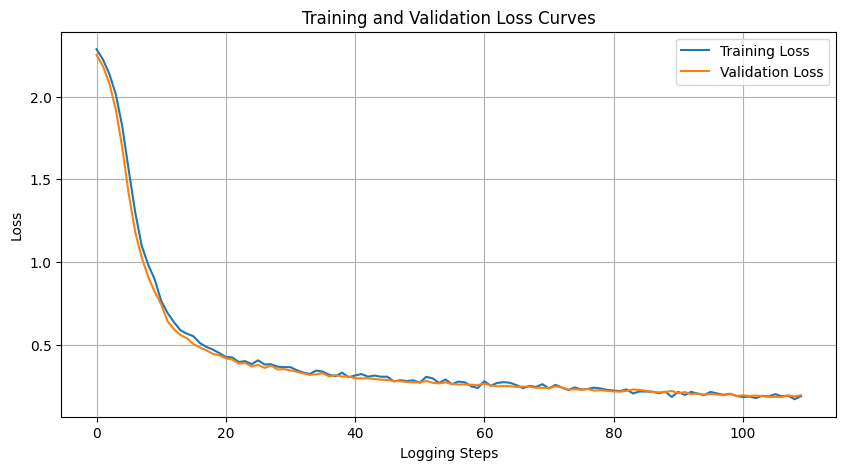

In [ ]:
# Lists to store average training and validation losses for plotting
train_losses = []
val_losses = []

# Loop over the dataset for 10 epochs
for epoch in range(10):
    running_loss = 0.0       # Accumulates training loss during each logging interval (40 batches)
    running_vloss = 0.0      # Accumulates validation loss during evaluation

    print(f"\nEpoch {epoch+1}")  # Print the current epoch number

    # Create a progress bar for the current epoch
    progress_bar = tqdm(enumerate(trainloader, 0), total=len(trainloader), desc="Training")

    # Iterate through each mini-batch of training data
    for i, data in progress_bar:
        inputs, labels = data              # Unpack input features and corresponding labels
        optimizer.zero_grad()              # Reset gradients to zero before backpropagation

        outputs = model(inputs)            # Forward pass: compute predicted outputs
        loss = criterion(outputs, labels)  # Compute loss between predictions and ground-truth
        loss.backward()                    # Backward pass: compute gradients of loss w.r.t. model parameters
        optimizer.step()                   # Update model parameters based on gradients
        running_loss += loss.item()        # Accumulate training loss for the current interval

        # Every 40 mini-batches, evaluate model on validation set
        if i % 40 == 39:
            model.train(False)  # Switch to evaluation mode (disables dropout, batch norm updates, etc.)

            for j, vdata in enumerate(testloader, 0):  # Loop through validation data
                vinputs, vlabels = vdata
                voutputs = model(vinputs)               # Forward pass on validation data
                vloss = criterion(voutputs, vlabels)    # Compute validation loss
                running_vloss += vloss.item()           # Accumulate validation loss

            model.train(True)  # Switch back to training mode for next batch

            # Compute average training and validation loss for this interval
            avg_loss = running_loss / 40
            avg_vloss = running_vloss / len(testloader)

            # Store the average losses to plot later
            train_losses.append(avg_loss)
            val_losses.append(avg_vloss)

            # Update the progress bar with the latest loss values
            progress_bar.set_postfix({"Train Loss": avg_loss, "Val Loss": avg_vloss})

            # Reset accumulators for the next 40 mini-batches
            running_loss = 0.0
            running_vloss = 0.0

# Print final confirmation
print('Finished Training')

# ==================== Plotting the loss curves ====================

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Logging Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
 print("Validation accuracy is: ", accuracy(testloader).item())

<ipython-input-7-6a64ef2ad3c7>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ypred = F.softmax(model(images))


Validation accuracy is:  0.9470000267028809



Epoch 1


Training: 100%|██████████| 469/469 [01:32<00:00,  5.07it/s, Train Loss=0.211, Val Loss=0.183]



Epoch 2


Training: 100%|██████████| 469/469 [01:29<00:00,  5.23it/s, Train Loss=0.132, Val Loss=0.122]



Epoch 3


Training: 100%|██████████| 469/469 [01:28<00:00,  5.28it/s, Train Loss=0.118, Val Loss=0.0883]



Epoch 4


Training: 100%|██████████| 469/469 [01:29<00:00,  5.27it/s, Train Loss=0.0848, Val Loss=0.076]



Epoch 5


Training: 100%|██████████| 469/469 [01:28<00:00,  5.28it/s, Train Loss=0.0724, Val Loss=0.0693]


Finished Training


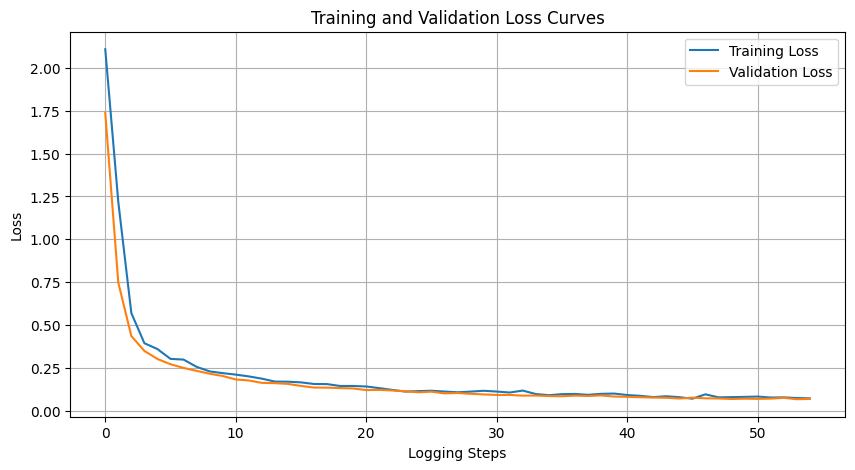

<All keys matched successfully>

In [ ]:
# ========================== Model Setup ==========================

# Initialize the convolutional neural network model from the CNN class
model = CNN()

# Define the loss function — CrossEntropyLoss is used for multi-class classification problems
criterion = nn.CrossEntropyLoss()

# Define the optimizer — SGD with a small learning rate and momentum for smoothing updates
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Lists to record average training and validation losses for plotting or analysis
train_losses = []
val_losses = []

# ========================== Training Loop ==========================

# Loop over the dataset for 5 epochs (full passes over the training data)
for epoch in range(5):
    running_loss = 0.0       # Running sum of training loss for logging every 40 mini-batches
    running_vloss = 0.0      # Running sum of validation loss during evaluation

    print(f"\nEpoch {epoch+1}")  # Print the current epoch (1-based indexing)

    # Initialize a progress bar for the epoch using tqdm
    progress_bar = tqdm(enumerate(trainloader, 0), total=len(trainloader), desc="Training")

    # Loop over training data in mini-batches
    for i, data in progress_bar:
        inputs, labels = data            # Unpack the current batch into input images and their labels

        optimizer.zero_grad()            # Clear old gradients before the backward pass

        outputs = model(inputs)          # Forward pass through the model to get predictions
        loss = criterion(outputs, labels)  # Calculate loss between predictions and ground-truth labels
        loss.backward()                  # Backward pass: compute gradients of loss w.r.t. model weights
        optimizer.step()                 # Update the weights using the computed gradients

        running_loss += loss.item()      # Accumulate training loss for averaging later

        # Every 40 mini-batches, evaluate model performance on validation data
        if i % 40 == 39:
            model.train(False)  # Set the model to evaluation mode (disables dropout, etc.)

            # Loop through the validation data
            for j, vdata in enumerate(testloader, 0):
                vinputs, vlabels = vdata
                voutputs = model(vinputs)               # Forward pass on validation data
                vloss = criterion(voutputs, vlabels)    # Compute loss on validation batch
                running_vloss += vloss.item()           # Accumulate validation loss

            model.train(True)  # Return model to training mode

            # Compute average losses over the last 40 training batches and the full validation set
            avg_loss = running_loss / 40
            avg_vloss = running_vloss / len(testloader)

            # Record average losses for plotting or future analysis
            train_losses.append(avg_loss)
            val_losses.append(avg_vloss)

            # Update the progress bar with current loss values
            progress_bar.set_postfix({"Train Loss": avg_loss, "Val Loss": avg_vloss})

            # Reset running losses for the next interval
            running_loss = 0.0
            running_vloss = 0.0

# After all epochs complete, print a final message
print('Finished Training')


# ==================== Plotting the loss curves ====================

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Logging Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
os.makedirs('./Models', exist_ok=True)
torch.save(model.state_dict(), './Models/model_weights.pth')

# Reload the model later
model = CNN()
model.load_state_dict(torch.load('./Models/model_weights.pth'))

In [ ]:
print("Validation accuracy is: ", accuracy(testloader).item())

<ipython-input-6-6a64ef2ad3c7>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  ypred = F.softmax(model(images))


Validation accuracy is:  0.9800999760627747


torch.Size([1, 28, 28])


Text(0.5, 1.0, 'A sample image')

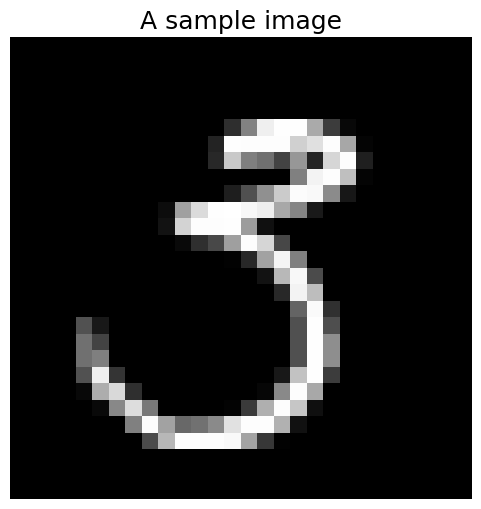

In [ ]:
# You can then Load the model in the following manner
model = CNN()
model.load_state_dict(torch.load("./Models/model_weights.pth"))

# Let's visualize the feature maps
# Acquire an image
images = next(iter(trainloader))
image = images[0][0]
print(image.shape)

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
axs.imshow(image.numpy()[0, :, :], cmap="gray")
axs.axis("off")
axs.set_title("A sample image", fontsize=18)

torch.Size([16, 28, 28])
torch.Size([32, 14, 14])


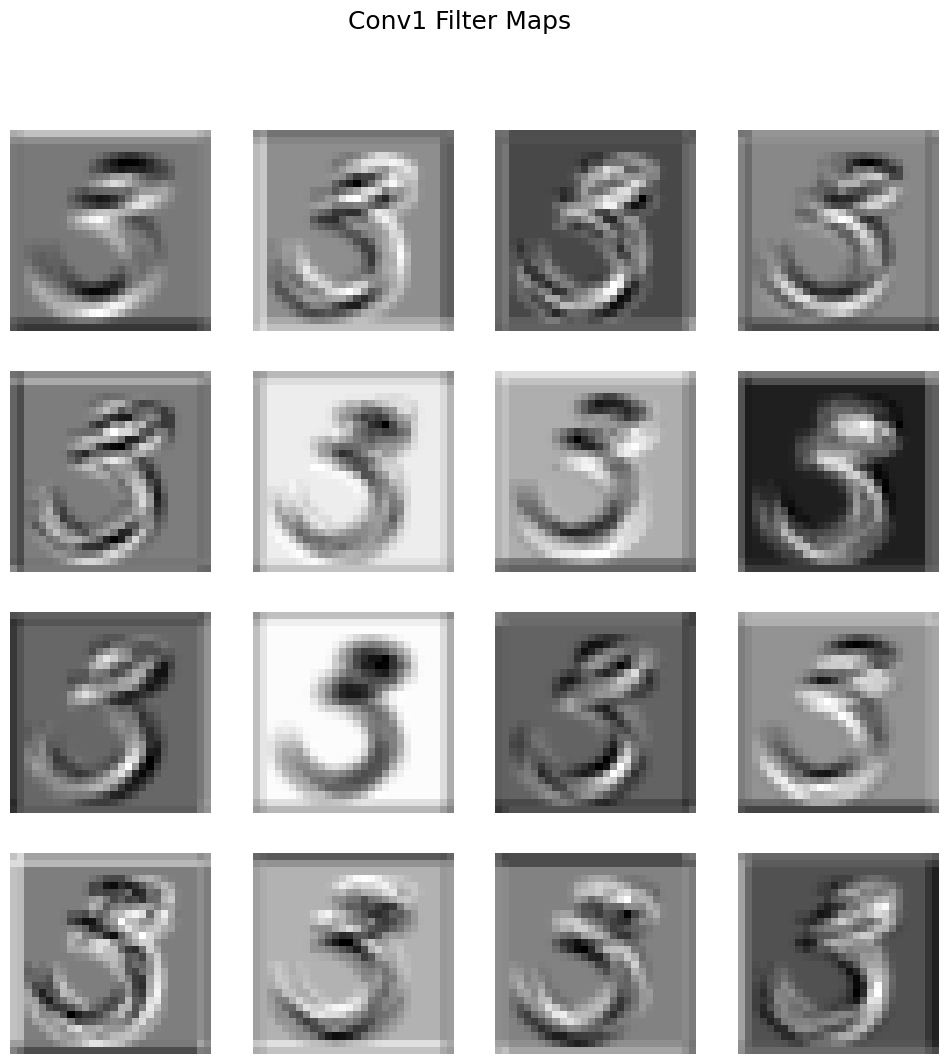

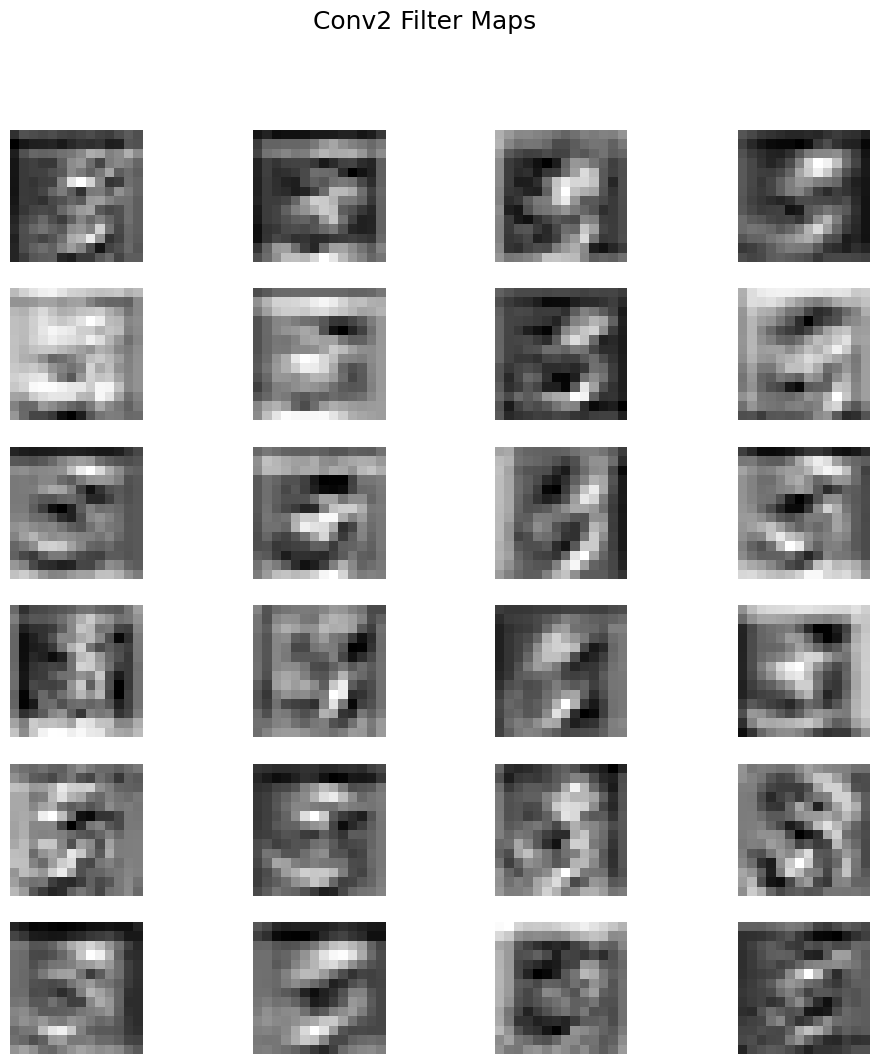

In [ ]:
with torch.no_grad():
    feat_map1 = model.conv1(image)
    print(feat_map1.shape)
    feat_map1 = feat_map1.detach().numpy()
    fig, axs = plt.subplots(4, 4, figsize=(12, 12))
    for i, ax in enumerate(axs.flat):
        if i < feat_map1.shape[1]:  # Check if the channel index is less than the number of channels
            # Index the batch dimension (0) and the channel dimension (i)
            ax.imshow(feat_map1[i, :, :], cmap="gray")
            ax.axis('off')  # Hide the axis
        else:
            ax.axis('off')  # Hide the axis for unused subplots

    fig.suptitle("Conv1 Filter Maps", fontsize=18)

    feat_map2 = model.conv1(image)
    feat_map2 = F.relu(feat_map2)
    feat_map2 = model.pool(feat_map2)
    feat_map2 = model.conv2(feat_map2)
    print(feat_map2.shape)
    feat_map2 = feat_map2.detach().numpy()
    fig, axs = plt.subplots(6, 4, figsize=(12, 12))
    for i, ax in enumerate(axs.flat):
        if i < feat_map2.shape[0]:  # Check if the channel index is less than the number of channels
            # Index the batch dimension (0) and the channel dimension (i)
            ax.imshow(feat_map2[i, :, :], cmap="gray")
            ax.axis('off')  # Hide the axis
        else:
            ax.axis('off')  # Hide the axis for unused subplots

    fig.suptitle("Conv2 Filter Maps", fontsize=18)


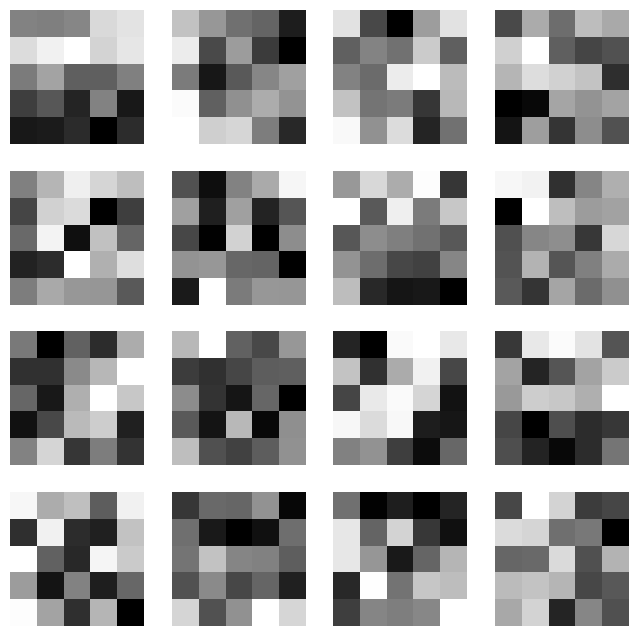

In [ ]:
# Visualizing the kernels
# Extracting the weights of the first convolutional layer
# The shape of the weights is [out_channels, in_channels, kernel_height, kernel_width]
kernels = model.conv1.weight.detach()

# Move kernels to CPU if they are on GPU
kernels = kernels.cpu()

# Normalize kernels to [0,1] for visualization
kernels = (kernels - kernels.min()) / (kernels.max() - kernels.min())

# Assuming you're dealing with a single input channel (e.g., grayscale images),
# you might want to visualize each output channel's kernel separately.
num_kernels = kernels.size(0)

# Set up the subplot dimensions
cols = int(np.sqrt(num_kernels))
rows = (num_kernels // cols) + (0 if num_kernels % cols == 0 else 1)

fig, axs = plt.subplots(rows, cols, figsize=(cols*2, rows*2))

for i, ax in enumerate(axs.flat):
    if i < num_kernels:
        # Select the i-th kernel, note that kernels[i].shape == [in_channels, H, W],
        # for grayscale (single channel inputs), it will be [1, H, W].
        # We squeeze it to [H, W] for visualization.
        kernel = kernels[i].squeeze()
        # For single-channel inputs, you can index as [0] to get the 2D kernel if in_channels > 1.
        # If your model works with multi-channel images (e.g., RGB), you'll need a strategy
        # to visualize these 3D kernels, such as showing each input channel's kernel separately.

        ax.imshow(kernel, cmap='gray')
        ax.axis('off')
    else:
        ax.axis('off')

plt.show()

### ***Note:*** *Some of the above kernels, even though the Network was only trained for a few epoches managed to encapsulate diagonals, vertical, horizontal lines and blobs.*

---

### ***Transfer Learning*** is widely used to accelerate Model building and utilize pre-existing knowledge/experties about a specific data field. For example, there is a multitude of Huge, Trained models that have widely captured the intricasies of the Images of the physical World. Now, assume I have a specific task at hand, which involves classifying a specific set of Images. Instead of training a huge network again, ***I can simply use a pretrained model*** and ***only Train the last Fully-Connected Layers that perform the classification task***. One can even go a step further and ***allow for the last convolutions to be trainable*** to increase the accuracy even more. (Note the the deeper the convolutions are the more semantic the task they carry out is)


<div style="margin: auto; width: 90%">
<img src="https://www.researchgate.net/publication/338540456/figure/fig1/AS:850909840015360@1579884123355/Transfer-learning-Transfer-learning-is-process-of-taking-pretrained-model-usually.png" alt="Subdirectory Image" width="900"/>
</div>


In [ ]:
# Transfer Learning
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # Match ResNet input size
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170M/170M [00:05<00:00, 29.9MB/s]


In [ ]:
model = torchvision.models.resnet18(pretrained=True)

# Freeze model parameters (for feature extraction only, remove for fine-tuning)
for param in model.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(classes))  # Adapt to CIFAR-10

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 204MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.CrossEntropyLoss()

# Optimize only the fully connected layer (for fine-tuning, include all parameters)
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)


In [ ]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #print('ok')
        running_loss += loss.item()
        if i % 100 == 99:  # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,   100] loss: 0.908
[1,   200] loss: 0.865
[1,   300] loss: 0.831
[2,   100] loss: 0.785
[2,   200] loss: 0.765
[2,   300] loss: 0.757
[3,   100] loss: 0.754
[3,   200] loss: 0.717
[3,   300] loss: 0.722
[4,   100] loss: 0.707
[4,   200] loss: 0.699
[4,   300] loss: 0.694
[5,   100] loss: 0.672
[5,   200] loss: 0.697
[5,   300] loss: 0.686
Finished Training


In [ ]:
# Helper function that calculates the Accuracy of a given dataset/dataloader
# Helper function to calculate accuracy
def accuracy(loader):
    model.eval()  # Set model to evaluation mode
    total = 0
    correct = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            ypred = torch.argmax(F.softmax(outputs, dim=1), dim=1)
            total += labels.size(0)
            correct += (ypred == labels).sum().item()
    model.train()  # Set model back to training mode
    return correct / total

print(accuracy(testloader))

0.7678


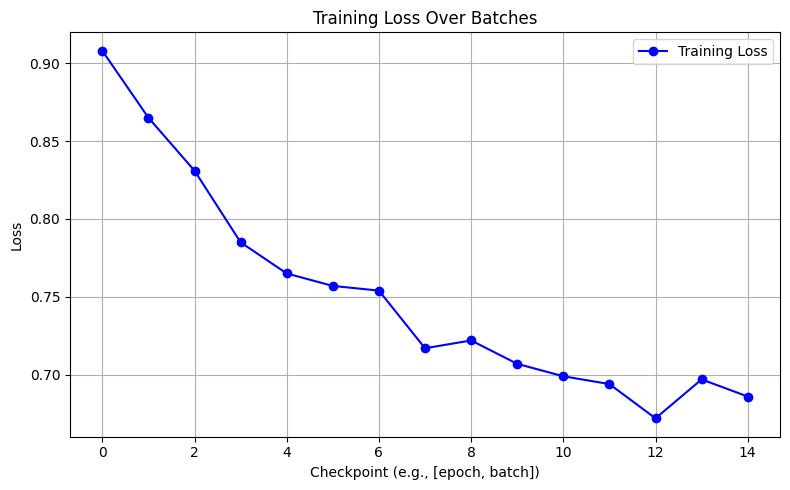

In [ ]:
import matplotlib.pyplot as plt

# Loss values
losses = [0.908, 0.865, 0.831, 0.785, 0.765, 0.757,
          0.754, 0.717, 0.722, 0.707, 0.699, 0.694,
          0.672, 0.697, 0.686]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(losses, marker='o', linestyle='-', color='blue', label='Training Loss')
plt.title("Training Loss Over Batches")
plt.xlabel("Checkpoint (i.e. epoch*batch)")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
